In [341]:
from bs4 import BeautifulSoup
import requests
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz
import numpy as np
import pickle
import pylab

%matplotlib inline

In [342]:
link = 'http://164.100.47.194/Loksabha/Debates/DebateAdvSearch15.aspx'
contents = requests.get(link).content
soup = BeautifulSoup(contents, 'html.parser')

In [343]:
types_of_debates = {}

records = soup.find('select', id = 'ContentPlaceHolder1_ddldebtype')
for option in records.find_all('option'):
    types_of_debates[option.text] = option['value']
    
types_of_debates.pop('--- Select Debate Type ---', None)

'--- Select Debate Type ---'

In [359]:
debate_graphs = {}
for key in types_of_debates:
    debate_graphs[key] = {}

In [360]:
debate_name = 'CALLING ATTENTION (RULE-197)'
f = open('../Data/Debates/' + debate_name + '.htm')
contents = f.read()
soup = BeautifulSoup(contents, 'html.parser')
f.close()

In [361]:
records = soup.find_all('td')
filtered_records = [rec.find_next_sibling('td') for rec in records if 'Participants:' in rec.text]
debate_participants = []

for rec in filtered_records:
    current_participants = rec.find_all('a')
    debate_participants.append(set([p.text for p in current_participants]))

In [362]:
f = open('../Data/members_of_parliament.htm')
contents = f.read()
f.close()
soup = BeautifulSoup(contents, 'html.parser')

In [363]:
table_of_contents = soup.find_all('td')
members = []
for rec in table_of_contents:
    text = rec.text.strip().replace(',', ' ')
    text = text.split()
    if 'Shri' in text:
        text.remove('Shri')
    elif 'Smt.' in text:
        text.remove('Smt.')
    elif 'Dr.' in text:
        text.remove('Dr.')
    text = ' '.join(text)
    members.append(text)
    
members = members[5:]
member_details = {}
n = len(members)

for i in range(0, n, 3):
    member_details[members[i]] = (members[i + 1], members[i + 2])
    
member_details

{'Adhalrao Patil Shivaji': ('Shiv Sena', 'Shirur (Maharashtra)'),
 'Adhikari Deepak (Dev)': ('All India Trinamool Congress',
  'Ghatal (West Bengal)'),
 'Adhikari Dibyendu': ('All India Trinamool Congress', 'Tamluk (West Bengal)'),
 'Adhikari Sisir Kumar': ('All India Trinamool Congress',
  'Kanthi (West Bengal)'),
 'Adityanath Yogi': ('Bharatiya Janata Party', 'Gorakhpur (Uttar Pradesh)'),
 'Adsul Anandrao': ('Shiv Sena', 'Amravati (SC)(Maharashtra)'),
 'Advani Lal Krishna': ('Bharatiya Janata Party', 'Gandhinagar (Gujarat)'),
 'Agrawal Rajendra': ('Bharatiya Janata Party', 'Meerut (Uttar Pradesh)'),
 'Ahir Hansraj Gangaram': ('Bharatiya Janata Party',
  'Chandrapur (Maharashtra)'),
 'Ahlawat Santosh': ('Bharatiya Janata Party', 'Jhunjhunu (Rajasthan)'),
 'Ahluwalia S.S.': ('Bharatiya Janata Party', 'Darjeeling (West Bengal)'),
 'Ahmed Sultan': ('All India Trinamool Congress', 'Uluberia (West Bengal)'),
 'Ajmal Maulana Badruddin': ('All India United Democratic Front',
  'Dhubri (Assam

In [364]:
parties = set([])

for rec in member_details:
    parties.add(member_details[rec][0])

In [365]:
colors = ['8b8378', 'cdb79e', '000000', '2f4f4f', '191970', '6495ed', '7b68ee', '00ffff', '66cdaa', '7fffd4', '006400', '556b2f', '00ff7f', 'f0e68c', 'bdb76b', 'ffff00', 'daa520', 'b8860b', 'bc8f8f', 'f4a460', 'd2691e', 'b22222', '4682b4', 'ff0000', 'ff1493', 'db7093', 'd02090', '9932cc', 'd8bfd8', 'bebebe', '0000ff', 'ff8c00', 'ffd700', 'e9967a', 'ffdead', 'ffffff']

parties = list(parties)

color_map = {}

for i in range(len(parties)):
    color_map[parties[i]] = '#' + colors[i]

In [366]:
G = nx.Graph()
nodes = set([])

for rec in debate_participants:
    for p in rec:
        text = p.split()
        if 'Shri' in text:
            text.remove('Shri')
        elif 'Smt.' in text:
            text.remove('Smt.')
        elif 'Dr.' in text:
            text.remove('Dr.')
        text = ' '.join(text)
        nodes.add(text)
        
nodes = list(nodes)

In [367]:
candidate_color = []
name_map = {}

for rec in nodes:
    if rec in member_details:
        candidate_color.append(color_map[member_details[rec][0]])
        name_map[rec] = rec
    elif rec == 'Singh Alias Pappu Singh Uday':
        candidate_color.append(color_map[member_details['Ranjan (Pappu Yadav) Rajesh'][0]])
        name_map[rec] = 'Ranjan (Pappu Yadav) Rajesh'
    elif rec == 'De Ratna':
        candidate_color.append(color_map[member_details['De(Nag) (Smt.) Ratna'][0]])
        name_map[rec] = 'De(Nag) (Smt.) Ratna'
    elif rec == 'Patel Devji':
        candidate_color.append(color_map[member_details['Patel Devji Mansingram'][0]])
        name_map[rec] = 'Patel Devji Mansingram'
    elif rec == 'Ray Saugata':
        candidate_color.append(color_map[member_details['Roy Prof. Saugata'][0]])
        name_map[rec] = 'Roy Prof. Saugata'
    elif rec == 'Chanabasappa Udasi Shivkumar':
        candidate_color.append(color_map[member_details['Udasi Shivkumar Chanabasappa'][0]])
        name_map[rec] = 'Udasi Shivkumar Chanabasappa'
    elif rec == 'Narayanasamy V.': 
        candidate_color.append(color_map[member_details['Ramachandran Krishnan Narayanasamy'][0]])  
        name_map[rec] = 'Ramachandran Krishnan Narayanasamy'
    elif rec == 'Dastidar Kakli Ghosh':
        candidate_color.append(color_map[member_details['Dastidar (Smt.) Kakoli Ghosh'][0]])
        name_map[rec] = 'Dastidar (Smt.) Kakoli Ghosh'
    elif rec == 'Thambidurai M.':
        candidate_color.append(color_map[member_details['Thambi Durai M.'][0]])
        name_map[rec] = 'Thambi Durai M.'
    elif rec == 'Thomas Prof. K.V.':
        candidate_color.append(color_map[member_details['Thomas Prof. Kuruppassery Varkey'][0]])
        name_map[rec] = 'Thomas Prof. Kuruppassery Varkey'
    elif rec == 'Pandurang Munde Gopinathrao':
        candidate_color.append(color_map[member_details['Munde Pritam Gopinath'][0]])
        name_map[rec] = 'Munde Pritam Gopinath'
    elif rec == 'Agarwal Rajendra':
        candidate_color.append(color_map[member_details['Agrawal Rajendra'][0]])
        name_map[rec] = 'Agrawal Rajendra'
    elif rec == 'Azad Kirti (Jha)':
        candidate_color.append(color_map[member_details['Azad Kirti (JHA)'][0]])
        name_map[rec] = 'Azad Kirti (JHA)'
    else:
        name_map[rec] = rec
        candidate_color.append('#5E5C51')
    
nodes = [name_map[rec] for rec in nodes]
    
G.add_nodes_from(nodes)

In [377]:
edge_weights = {}

for rec in debate_participants:
    for p1 in rec:
        for p2 in rec:
            if p1 == p2:
                continue
            text1 = p1.split()
            if 'Shri' in text1:
                text1.remove('Shri')
            elif 'Smt.' in text1:
                text1.remove('Smt.')
            elif 'Dr.' in text1:
                text1.remove('Dr.')
            text1 = ' '.join(text1)
            text2 = p2.split()
            if 'Shri' in text2:
                text2.remove('Shri')
            elif 'Smt.' in text2:
                text2.remove('Smt.')
            elif 'Dr.' in text2:
                text2.remove('Dr.')
            text2 = ' '.join(text2)
            if (name_map[text1], name_map[text2]) in edge_weights:
                edge_weights[(name_map[text1], name_map[text2])] += 0.5 # 0.5 because each edge will be encountered twice
            elif (name_map[text2], name_map[text1]) in edge_weights:
                edge_weights[(name_map[text2], name_map[text1])] += 0.5
            else:
                edge_weights[(name_map[text1], name_map[text2])] = 0.5
                
edges = []

for e in edge_weights:
    edges.append((e[0], e[1], edge_weights[e]))

In [378]:
G.add_weighted_edges_from(edges)

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


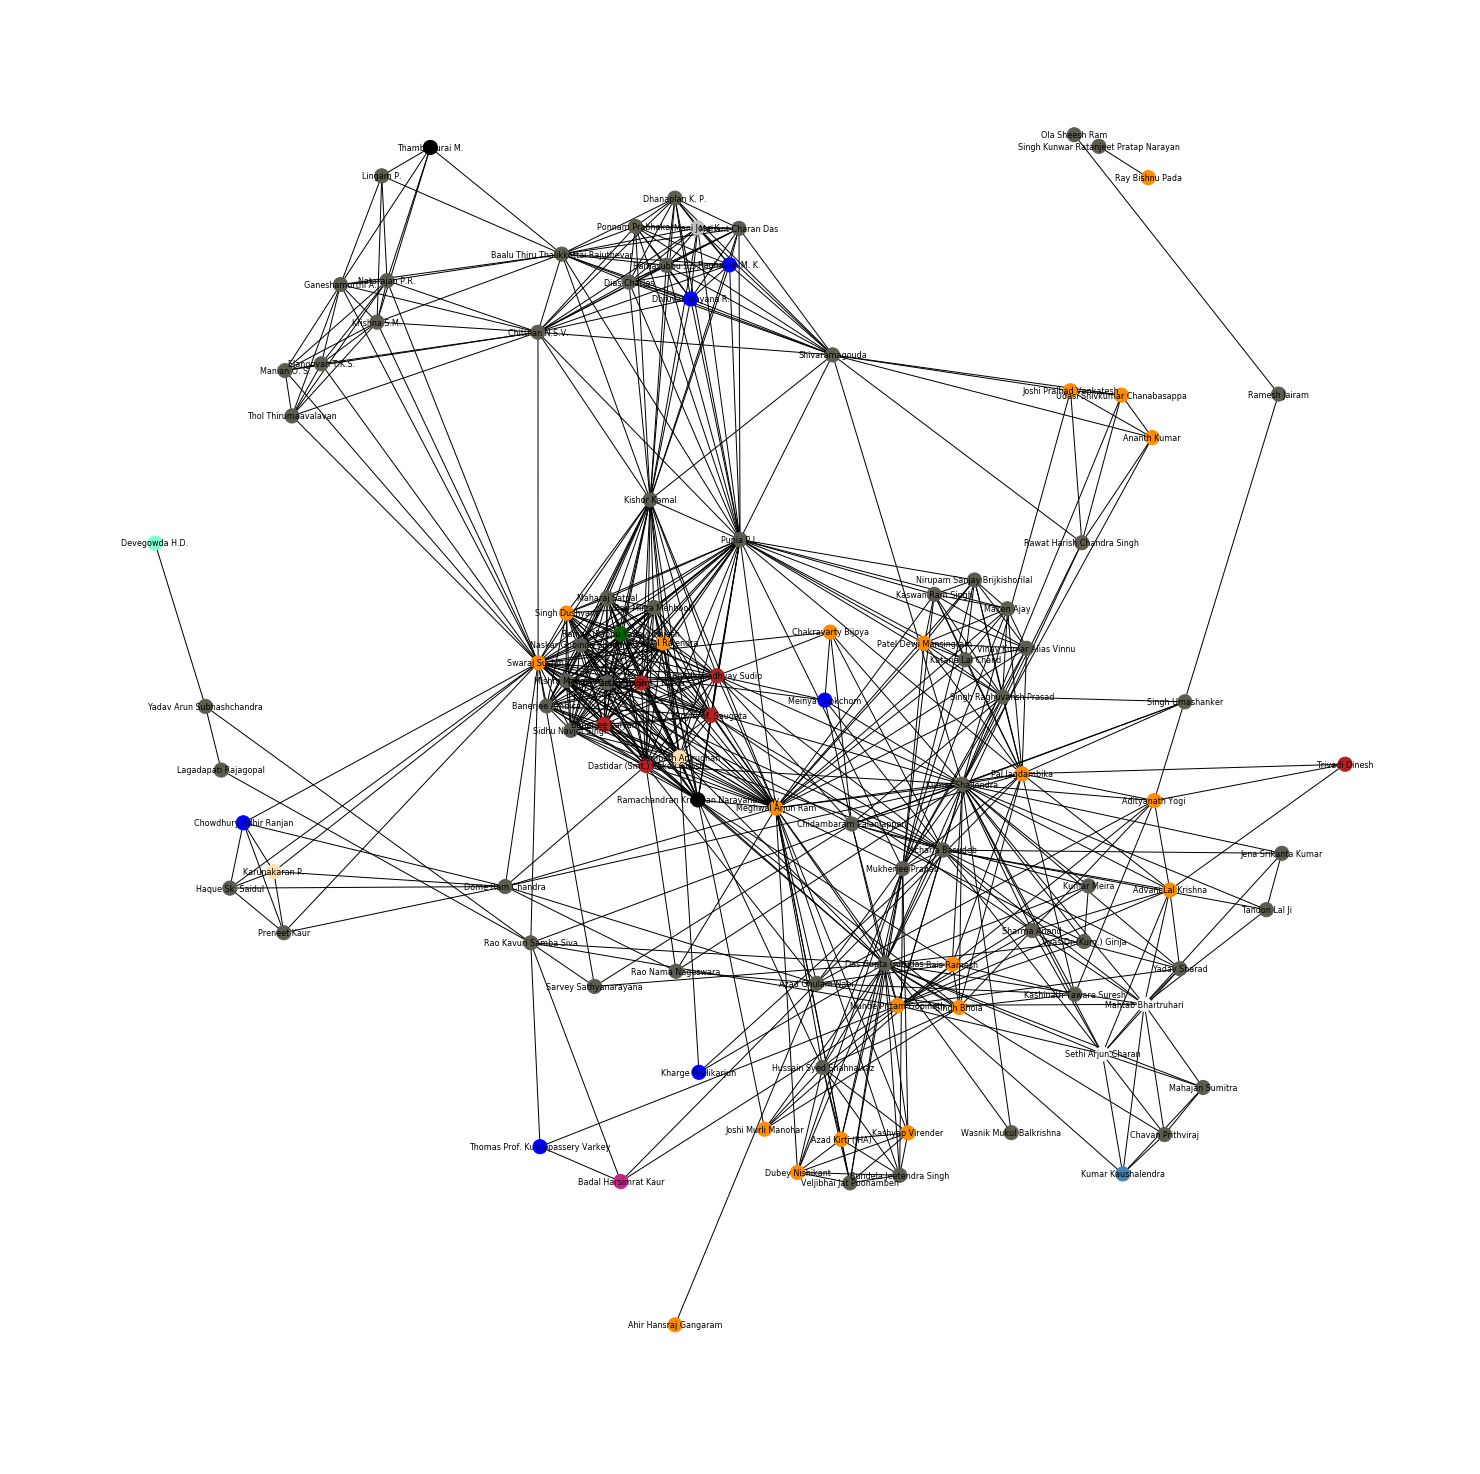

In [379]:
pos = nx.fruchterman_reingold_layout(G, weight = '0')

pylab.figure(1, figsize = (20, 20))
nx.draw(G, pos, with_labels = True, node_color = candidate_color, node_size = 200, font_size = 8)

#nx.draw_graphviz(G, with_labels = True, layout = 'random_layout')
plt.savefig('interaction_graph.png')

In [269]:
nx.write_graphml(G, 'network.graphml')

In [270]:
f = open('candidates_color.pickle', 'wb')
pickle.dump(candidate_color, f, protocol = 2)
f.close()

In [271]:
f = open('edges.pickle', 'wb')
pickle.dump(edges, f, protocol = 2)
f.close()

In [272]:
f = open('parties.pickle', 'wb')
pickle.dump(color_map, f, protocol = 2)
f.close()

In [273]:
f = open('nodes.pickle', 'wb')
pickle.dump(nodes, f, protocol = 2)
f.close()

In [274]:
f = open('member_details.pickle', 'wb')
pickle.dump(member_details, f, protocol = 2)
f.close()